In [1]:
import logging

FORMAT = '%(levelname)s %(asctime)-15s: %(message)s'
logging.basicConfig(format=FORMAT)
logging.getLogger().setLevel(logging.INFO)

In [2]:
import alibaba_graph_rust

In [ ]:
avg_degree_by_instance_id = alibaba_graph_rust.run_op("average_degree", "/Volumes/EXTERNALHDD/traces/windows_by_instance_id")

In [ ]:
number_of_vertices_by_instance_id = alibaba_graph_rust.run_op("number_of_vertices", "/Volumes/EXTERNALHDD/traces/windows_by_instance_id")

In [ ]:
average_degree_by_microservice_id = alibaba_graph_rust.run_op("average_degree", "/Volumes/EXTERNALHDD/traces/windows_by_microservice_id")

In [ ]:
number_of_vertices_by_microservice_id = alibaba_graph_rust.run_op("number_of_vertices", "/Volumes/EXTERNALHDD/traces/windows_by_microservice_id")

In [8]:
import json


def export_result_to_json_file(result, file_path):
    with open(file_path, "w") as json_file:
        json.dump(result, json_file)
        

def import_result_from_json_file(file_path):
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
        
    return data

In [9]:
export_result_to_json_file(avg_degree_by_instance_id, "/Users/ashfaqsalehin/Documents/traces/output/avg_degree_by_instance_id.json")

export_result_to_json_file(number_of_vertices_by_instance_id, "/Users/ashfaqsalehin/Documents/traces/output/number_of_vertices_by_instance_id.json")

export_result_to_json_file(average_degree_by_microservice_id, "/Users/ashfaqsalehin/Documents/traces/output/average_degree_by_microservice_id.json")

export_result_to_json_file(number_of_vertices_by_microservice_id, "/Users/ashfaqsalehin/Documents/traces/output/number_of_vertices_by_microservice_id.json")

In [19]:
avg_degree_by_instance_id_reloaded = import_result_from_json_file("/Users/ashfaqsalehin/Documents/traces/output/avg_degree_by_instance_id.json")

number_of_vertices_by_instance_id_reloaded = import_result_from_json_file("/Users/ashfaqsalehin/Documents/traces/output/number_of_vertices_by_instance_id.json")

avg_degree_by_microservice_id_reloaded = import_result_from_json_file("/Users/ashfaqsalehin/Documents/traces/output/average_degree_by_microservice_id.json")

number_of_vertices_by_microservice_id_reloaded = import_result_from_json_file("/Users/ashfaqsalehin/Documents/traces/output/number_of_vertices_by_microservice_id.json")

In [127]:
import numpy as np
import matplotlib.pyplot as plt

def plot_result(result, attr_label, plot_label, plot_title, output_file_path):
    attr_values, window_idx, _, _, _ = zip(*result)
    plt.figure(figsize=(10, 7))
    plt.errorbar(window_idx, attr_values, label=plot_label, color='blue')
    
    plt.axhline(y=np.nanmean(attr_values), label=f"Mean  {attr_label}", color='r', linestyle='--')
    
    plt.xlabel('Window Number', fontsize=12)
    plt.ylabel(attr_label, fontsize=12)
    plt.title(plot_title, fontsize=16)
    
    plt.legend(loc='lower right', fontsize=12)
    
    plt.savefig(output_file_path)
    plt.show()

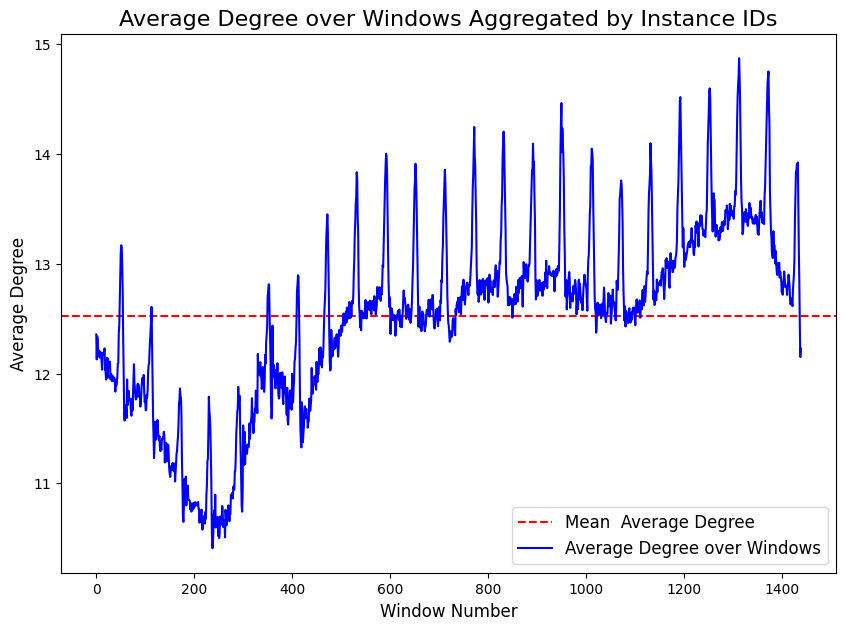

In [133]:
plot_result(
    avg_degree_by_instance_id_reloaded, 
    attr_label="Average Degree",
    plot_label="Average Degree over Windows",
    plot_title="Average Degree over Windows Aggregated by Instance IDs",
    output_file_path="/Users/ashfaqsalehin/Documents/traces/figs/avg_degree_by_instance_id.png"
)

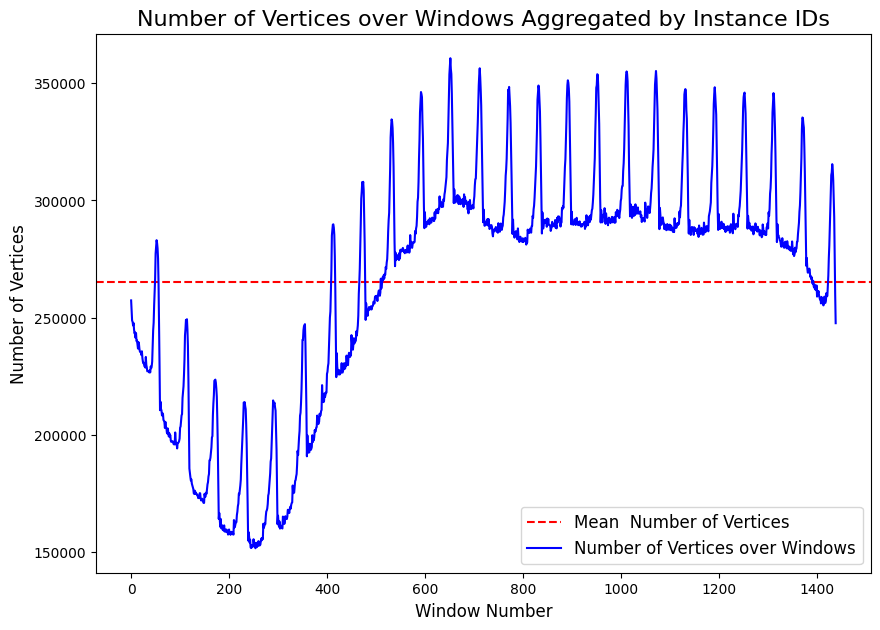

In [134]:
plot_result(
    number_of_vertices_by_instance_id_reloaded, 
    attr_label="Number of Vertices",
    plot_label="Number of Vertices over Windows",
    plot_title="Number of Vertices over Windows Aggregated by Instance IDs",
    output_file_path="/Users/ashfaqsalehin/Documents/traces/figs/number_of_vertices_by_instance_id.png"
)

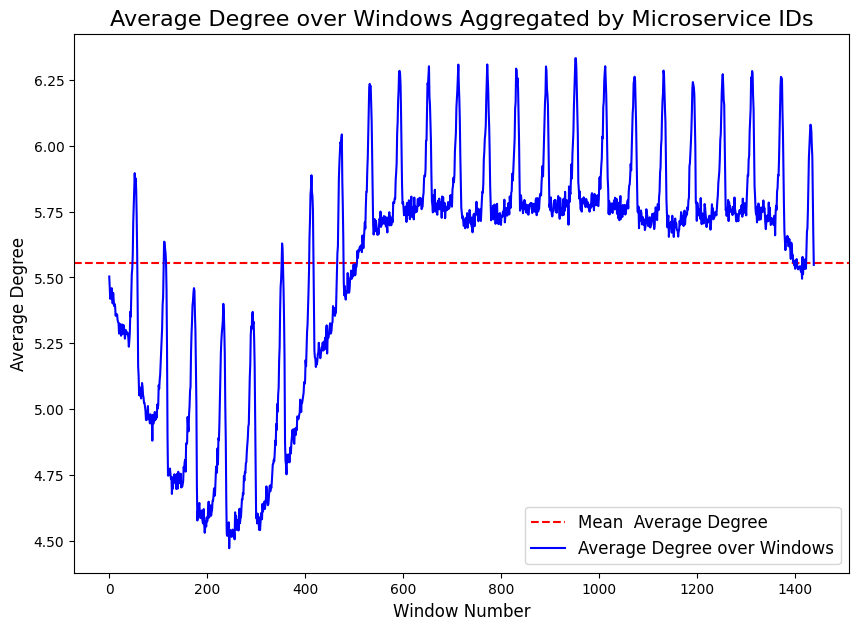

In [135]:
plot_result(
    avg_degree_by_microservice_id_reloaded, 
    attr_label="Average Degree",
    plot_label="Average Degree over Windows",
    plot_title="Average Degree over Windows Aggregated by Microservice IDs",
    output_file_path="/Users/ashfaqsalehin/Documents/traces/figs/avg_degree_by_microservice_id.png"
)

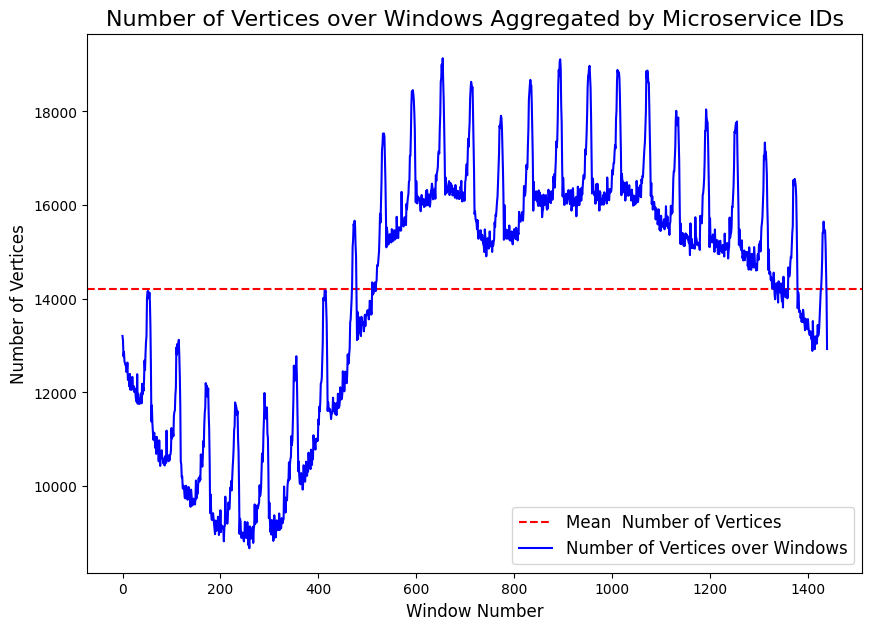

In [136]:
plot_result(
    number_of_vertices_by_microservice_id_reloaded, 
    attr_label="Number of Vertices",
    plot_label="Number of Vertices over Windows",
    plot_title="Number of Vertices over Windows Aggregated by Microservice IDs",
    output_file_path="/Users/ashfaqsalehin/Documents/traces/figs/number_of_vertices_by_microservice_id.png"
)